In [ ]:
#Project Details

In [10]:
#importnig Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
#import data

In [2]:
df = pd.read_csv("Real estate.csv")

In [ ]:
#checking shape of data

In [3]:
df.shape

(414, 8)

In [4]:
#checking datatypes

In [5]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
#checking data

In [7]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [9]:
#Cleaning dataset

In [ ]:
#dropping column date

In [12]:
df = df.drop('X1 transaction date', axis =1)

In [13]:
df.head(10)

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,17.9,1783.18000,3,24.96731,121.51486,22.1


In [14]:
df = df.drop('No', axis =1)

In [15]:
df.head(10)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
5,7.1,2175.03000,3,24.96305,121.51254,32.1
6,34.5,623.47310,7,24.97933,121.53642,40.3
7,20.3,287.60250,6,24.98042,121.54228,46.7
8,31.7,5512.03800,1,24.95095,121.48458,18.8
9,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
#dropping duplicate values

In [20]:
df = df.drop_duplicates()

In [22]:
#checking null values if any

In [21]:
df.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
#checking correlation between columns

In [25]:
df.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

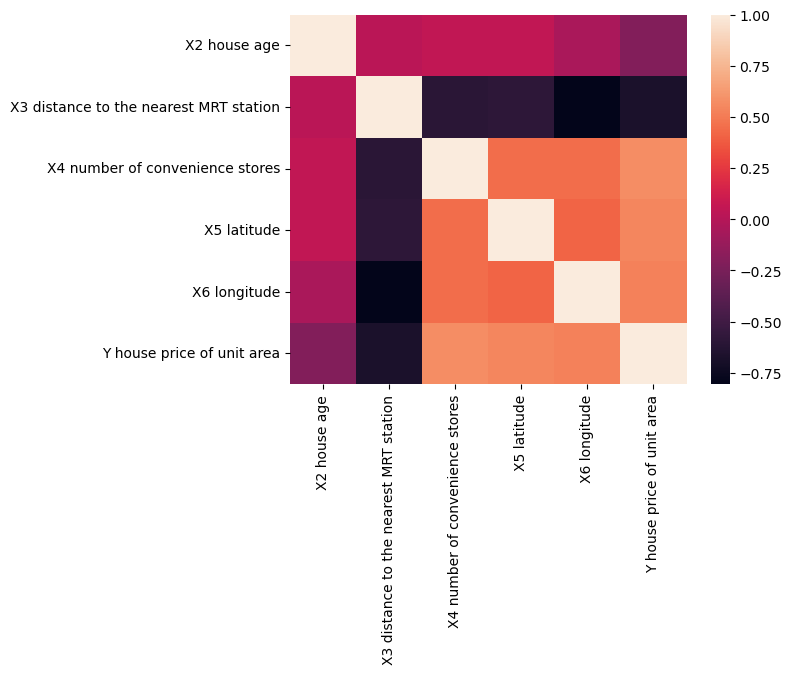

In [23]:
sns.heatmap(df.corr())

In [ ]:
#Assigning X and Y columns

In [36]:
X = df.iloc[:,0:5]

In [37]:
X.head(2)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951


In [38]:
y = df.iloc[:,-1]

In [39]:
y.head(2)

0    37.9
1    42.2
Name: Y house price of unit area, dtype: float64

In [40]:
#Standardizing X columns

In [41]:
scaler = MinMaxScaler()

In [42]:
X = scaler.fit_transform(X)

In [44]:
X

array([[0.73059361, 0.00951267, 1.        , 0.61694135, 0.71932284],
       [0.44520548, 0.04380939, 0.9       , 0.5849491 , 0.71145137],
       [0.30365297, 0.08331505, 0.5       , 0.67123122, 0.75889584],
       ...,
       [0.42922374, 0.05686115, 0.7       , 0.57149782, 0.71522536],
       [0.18493151, 0.0125958 , 0.5       , 0.42014057, 0.72395946],
       [0.14840183, 0.0103754 , 0.9       , 0.51211827, 0.75016174]])

In [46]:
#Splitting dataset into X and Y train test sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [47]:
#Applying models

In [55]:
def all_models(X_train,X_test,y_train,y_test):

    LR = LinearRegression()
    y_pred_LR = LR.fit(X_train,y_train).predict(X_test)
    accuracy_LR = r2_score(y_pred_LR,y_test)
    print(f"Accuracy Score for Linear Regression is : {accuracy_LR}")

    DTR = DecisionTreeRegressor()
    y_pred_DTR = DTR.fit(X_train,y_train).predict(X_test)
    accuracy_DTR = r2_score(y_pred_DTR,y_test)
    print(f"Accuracy Score for DecisionTreeRegressor is : {accuracy_DTR}")
    
    RFR = RandomForestRegressor()
    y_pred_RFR = RFR.fit(X_train,y_train).predict(X_test)
    accuracy_RFR = r2_score(y_pred_RFR,y_test)
    print(f"Accuracy Score for RandomForestRegressor is : {accuracy_RFR}")
    
    SupVR = SVR()
    y_pred_SupVR = SupVR.fit(X_train,y_train).predict(X_test)
    accuracy_SupVR = r2_score(y_pred_SupVR,y_test)
    print(f"Accuracy Score for SupportVectorRegressor is : {accuracy_SupVR}")
    

In [56]:
all_models(X_train,X_test,y_train,y_test)

Accuracy Score for Linear Regression is : 0.31437421178879166
Accuracy Score for DecisionTreeRegressor is : 0.4187890376484593
Accuracy Score for RandomForestRegressor is : 0.547736739354372
Accuracy Score for SupportVectorRegressor is : -0.08576954242365753


The accuracy needs to be improved